<a href="https://colab.research.google.com/github/paulcodrea/reddit_humor/blob/main/Humour_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [93]:
import requests
import pandas as pd

### Defining methods useful for scraping the Reddit threads


In [94]:
def scrape_url(url, pages=0):
  resp = requests.get(url=url, headers = {'User-agent': 'Humour detection bot'}, params = {'limit': '100'})
  data = resp.json()
  data_list = []
  data_list.append(data)
  # if more than 100 data points are needed:
  if pages != 0:
    for i in range(pages):
      after_param = data['data']['after'] 
      data = requests.get(url=url, headers = {'User-agent': 'Humour detection bot'}, params = {'after': after_param, 'limit': '100'})
      data_2 = data.json()
      data_list.append(data_2)
      data = data_2
  return data_list

def make_list_from_json(json_list):
  data = []
  for collection in json_list:
    collection_list = collection['data']['children']
    for joke_index in range(len(collection_list)):
      data.append(collection_list[joke_index]['data'])
  return data

def transform_data(data):
  df = pd.DataFrame(data)
  clean_df = pd.DataFrame()

  clean_df['title'] = df['title']
  clean_df['selftext'] = df['selftext']
  clean_df['ups'] = df['ups']
  clean_df['downs'] = df['downs']
  clean_df['upvote_ratio'] = df['upvote_ratio']
  clean_df['total_awards_received'] = df['total_awards_received']

  return clean_df

# Scraping r/dadjokes


In [95]:
url = "https://www.reddit.com/r/dadjokes.json"
data = scrape_url(url, 100)
data = make_list_from_json(data)

### Save only important columns in dataframe

In [96]:
clean_df = transform_data(data)

### Plot the stats of the reddit jokes

Number of jokes with upvotes different from zero:  9006
Number of jokes with no engagement:  609
Average number of upvotes:  216.08705148205928
Average upvote ratio:  0.8400894435777376


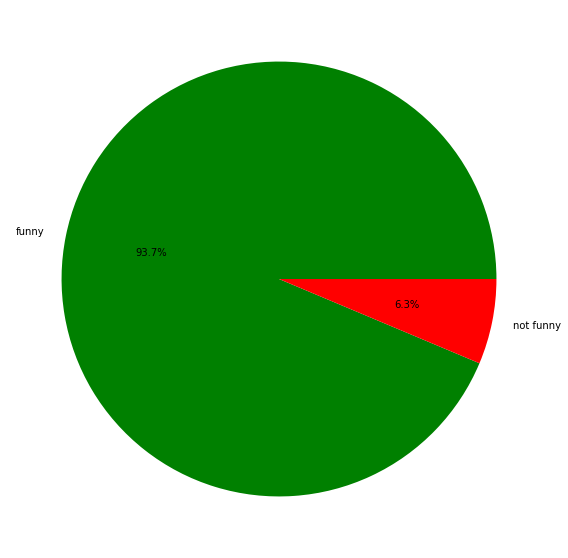

In [97]:
# print out as a pie chart how many jokes are funny or not
from matplotlib import pyplot as plt

# calculate number of posts with upvotes different grater than downvotes
funny = clean_df[clean_df['ups'] > clean_df['downs']]
# not_funny = clean_df[clean_df['ups'] <= clean_df['downs']]
no_engagement = len(clean_df[(clean_df['ups'] == 0) & (clean_df['downs'] == 0)])


#calculate how many have only upvotes and zero downvotes
upvotes_count = downvotes_count = 0
for index in range(len(clean_df)):
    if clean_df['ups'][index] > 0:
        upvotes_count += 1
    # elif clean_df['downs'][index] > 0:
    #     downvotes_count += 1

print("Number of jokes with upvotes different from zero: ", upvotes_count)
print("Number of jokes with no engagement: ", no_engagement)

treshhold_ups = clean_df['ups'].mean()
print("Average number of upvotes: ", treshhold_ups)
threshold_ratio = clean_df['upvote_ratio'].mean()
print("Average upvote ratio: ", threshold_ratio)


funny_percentage = len(funny) / len(clean_df) * 100
no_engagement_percentage = no_engagement / len(clean_df) * 100
# not_funny_percentage = len(not_funny) / len(clean_df) * 100

# set size of pie chart
plt.figure(figsize=(10,10))
plt.pie([funny_percentage, no_engagement_percentage], labels=['funny', 'not funny'], autopct='%1.1f%%', colors=['green', 'red'])
plt.show()

Experimenting to find a threshold 

In [98]:
unfunny_but_awarded = 0
funny = 0

jokes_dataset = pd.DataFrame()
for index in range(len(clean_df)):

  if clean_df['ups'][index] > treshhold_ups and clean_df['upvote_ratio'][index] > threshold_ratio:
    jokes_dataset = jokes_dataset.append(clean_df.iloc[index])
    funny = funny + 1


print('total ', len(clean_df))
print('not that funny but have awards ', unfunny_but_awarded)
print('funny ', funny)
print('funny ratio ', funny/len(clean_df))

total  9615
not that funny but have awards  0
funny  681
funny ratio  0.07082683307332294


In [99]:
# add one more column to jokes_dataset with length of selftext
jokes_dataset['title_length'] = jokes_dataset['title'].apply(len)
jokes_dataset['selftext_length'] = jokes_dataset['selftext'].apply(len)
print("The highest length of title is ", jokes_dataset['title_length'].max())
print("The highest length og the joke is: ", max(jokes_dataset['selftext_length']))

The highest length of title is  164
The highest length og the joke is:  393


In [100]:
# save jokes_dataset in a csv file
jokes_dataset.to_csv(f'reddit_funny_dadjokes({len(jokes_dataset)}).csv')

# Scraping r/badjokes


In [105]:
# Get reddit /r/badjokes data
url = "https://www.reddit.com/r/badjokes.json"
data_neg = scrape_url(url, 5)
data_neg = make_list_from_json(data_neg)

### Save only important columns in dataframe

In [107]:
badjokes_dataset = transform_data(data_neg)

In [108]:
print(len(badjokes_dataset))

600


In [110]:
# save jokes_dataset in a csv file
badjokes_dataset.to_csv(f'reddit_badjokes({len(badjokes_dataset)}).csv')